* ##  A SIMPLE PROJECT ON MULTIPLE LINEAR REGRESSION

* ### In this project, I'm going to use a dataset from Kaggle called Combined Cycle Power Plant Data Set that will help us in creating a Multple Linear Regression Model.
* ### I will also display important concepts when it comes to Multiple Linear Regression.

## 1. IMPORTING SOME OF THE LIBRARIES NEEDED

In [40]:
#Import all the libraries
import pandas as pd
import numpy as np

 ## 2. IMPORTING THE DATASET

In [20]:
# Loading the dataset and display the first 5 rows of the dataset
data_df = pd.read_excel('Folds5x2_pp.xlsx')
data_df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


* ## Attribute Information:

Features consist of hourly average ambient variables

- Ambient Pressure (AP) in the range 992.89-1033.30 milibar,
- Relative Humidity (RH) in the range 25.56% to 100.16%
- Exhaust Vacuum (V) in teh range 25.36-81.56 cm Hg
- Net hourly electrical energy output (PE) 420.26-495.76 MW

### The averages are taken from various sensors located around the plant that record the ambient variables every second. The variables are given without normalization.

 ## 3. DEFINE X AND Y

In [44]:
# Define X and Y
x = data_df.drop(['PE'],axis =1).values
y = data_df['PE'].values

# Printing the values of X
print(x)



[[  14.96   41.76 1024.07   73.17]
 [  25.18   62.96 1020.04   59.08]
 [   5.11   39.4  1012.16   92.14]
 ...
 [  31.32   74.33 1012.92   36.48]
 [  24.48   69.45 1013.86   62.39]
 [  21.6    62.52 1017.23   67.87]]


In [43]:
# Printing the values of y
print(y)

[463.26 444.37 488.56 ... 429.57 435.74 453.28]


## 4. SPLITTING THE DATASET IN TRAINING SET AND TEST SET

In machine learning, a dataset is typically divided into two parts: a training set and a test set.

* *A training set* 

A traing set is a subset of the dataset that is used to train a machine learning model. The goal of training a model is to learn the patterns and relationships in the data so that it can make accurate predictions on new, unseen data. The training set is used to optimize the model's parameters and improve its performance on the specific problem it is being trained for.

* *A test set* 

A test set is a subset of the dataset that is used to evaluate the performance of the trained model. The test set is a set of data that the model has never seen before and is used to test how well the model generalizes to new data. The test set is important because it allows us to estimate how well the model will perform on new, unseen data.

In [23]:
#Split arrays or matrices into random train and test subsets.
from sklearn.model_selection import train_test_split

# Here you also define the test size and random state
# Test sizes indicates how much percentage you want to give to our training dataset as well as test set
# For my case, I divided the dataset into a 30/70 percentage

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

## 5. TRAINING MODEL ON THE TRAINING SET

In [46]:
# importing the LinearRegression
from sklearn.linear_model import LinearRegression
ml= LinearRegression()
ml.fit(x_train,y_train)



LinearRegression()

## 6. PREDICT THE TEST SET RESULTS

In [29]:
#Here we are calling the predict function.
y_pred = ml.predict(x_test)
y_pred

array([431.40245096, 458.61474119, 462.81967423, ..., 432.47380825,
       436.16417243, 439.00714594])

In [31]:
# Here we are prdicting the PE value from our original data set using the x_test values 
# From the results, we can see that the predicted value is not accurate but it is close to our original PE value.

ml.predict([[14.96,41.76,1024.07,73.17]])

array([467.34820092])

## 7. EVALUATE THE MODEL

In [33]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)


0.9304112159477683

* ### From evaluating our model, we can confidently say that the accuracy of our model is ```93.04%```

## 8. VISUALIZE OUR PREDICTED RESULTS

Text(0.5, 1.0, 'ACTUAL VS PREDICTED')

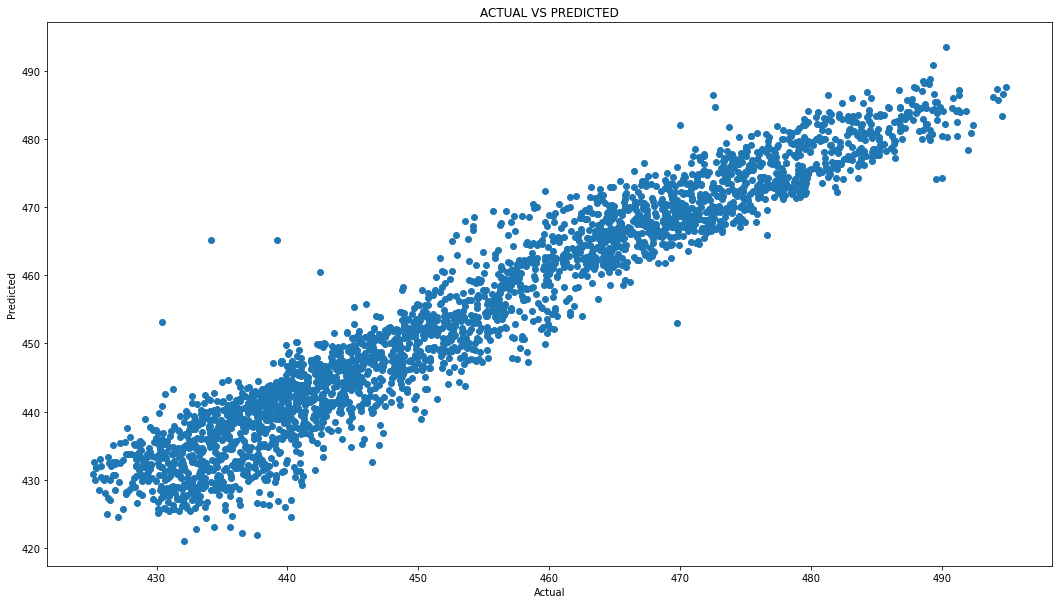

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,10))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('ACTUAL VS PREDICTED')

## 9. PREDICTED VALUES

In [51]:
#putting our predicted values in a Dataframe.
pred_y_df = pd.DataFrame({'Actual Value':y_test, 'Predicted Value':y_pred, 'Difference':abs(y_test-y_pred)/y_test*100})
pred_y_df[0:20]

,Actual Value,Predicted Value,Difference
0,431.23,431.402451,0.039990
1,460.01,458.614741,0.303311
2,461.14,462.819674,0.364244
3,445.90,448.601237,0.605794
4,451.29,457.879479,1.460143
5,432.68,429.676856,0.694080
6,477.50,473.017115,0.938824
7,459.68,456.532373,0.684743
8,477.50,474.342524,0.661251
9,444.99,446.364396,0.308860


In [55]:
# Doing a basic description of my DataFrame.
pred_y_df.describe()

,Actual Value,Predicted Value,Difference
count,2871.000000,2871.000000,2871.000000
mean,454.292901,454.289153,0.793597
std,17.111351,16.514211,0.604022
min,425.140000,420.973444,0.000027
25%,439.735000,440.441910,0.337525
50%,451.640000,451.918925,0.696308
75%,468.800000,468.867504,1.119792
max,494.900000,493.545031,7.150280


## 10. CONCLUSIONS

* We can see that there is no much difference, the predicted values are pretty much close to the actual values.
* This shows that our model is a strong model.
* However, there are other methods that we can use to further improve this model.